In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from statistics import mode

## Check Training file and Testing file

In [3]:
# Load the training data
train = pd.read_csv('Training.csv')
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
train.shape

(4920, 134)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [6]:
# drop unnecessary columns
train= train.drop(columns=['Unnamed: 133'])

In [7]:
train.shape

(4920, 133)

In [8]:
# Load the testing data
test = pd.read_csv('Testing.csv')
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [9]:
test.shape

(42, 133)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


### First we combine Testing and Training file into on file 

In [11]:
# Combine the train and test datasets
combined = pd.concat([train, test], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined.to_csv('combined_file.csv', index=False)

In [12]:
## Checking data from we have combined file
data = pd.read_csv('combined_file.csv')
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [13]:
data.shape

(4962, 133)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [15]:
# Checking for missing values
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [16]:
# check duplicate values
data.duplicated().sum()

4657

In [17]:
# check our data again
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [18]:
# describe statistics of data
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,0.021967,...,0.021967,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176
std,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,0.146590,...,0.146590,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
import plotly.express as px

# Assuming data_training contains your dataset

# Calculate the frequency of each symptom
symptom_frequency = data.drop('prognosis', axis=1).sum().sort_values(ascending=False)

# Select the top 10 most frequent symptoms
top_10_symptoms = symptom_frequency.head(10)

# Create a dataframe from the top 10 symptoms
top_10_symptoms_df = top_10_symptoms.reset_index()
top_10_symptoms_df.columns = ['Symptom', 'Frequency']

# Plot the top 10 most frequent symptoms using Plotly Express
fig = px.bar(top_10_symptoms_df, x='Symptom', y='Frequency', title='Top 10 Most Frequent Symptoms')
fig.show()


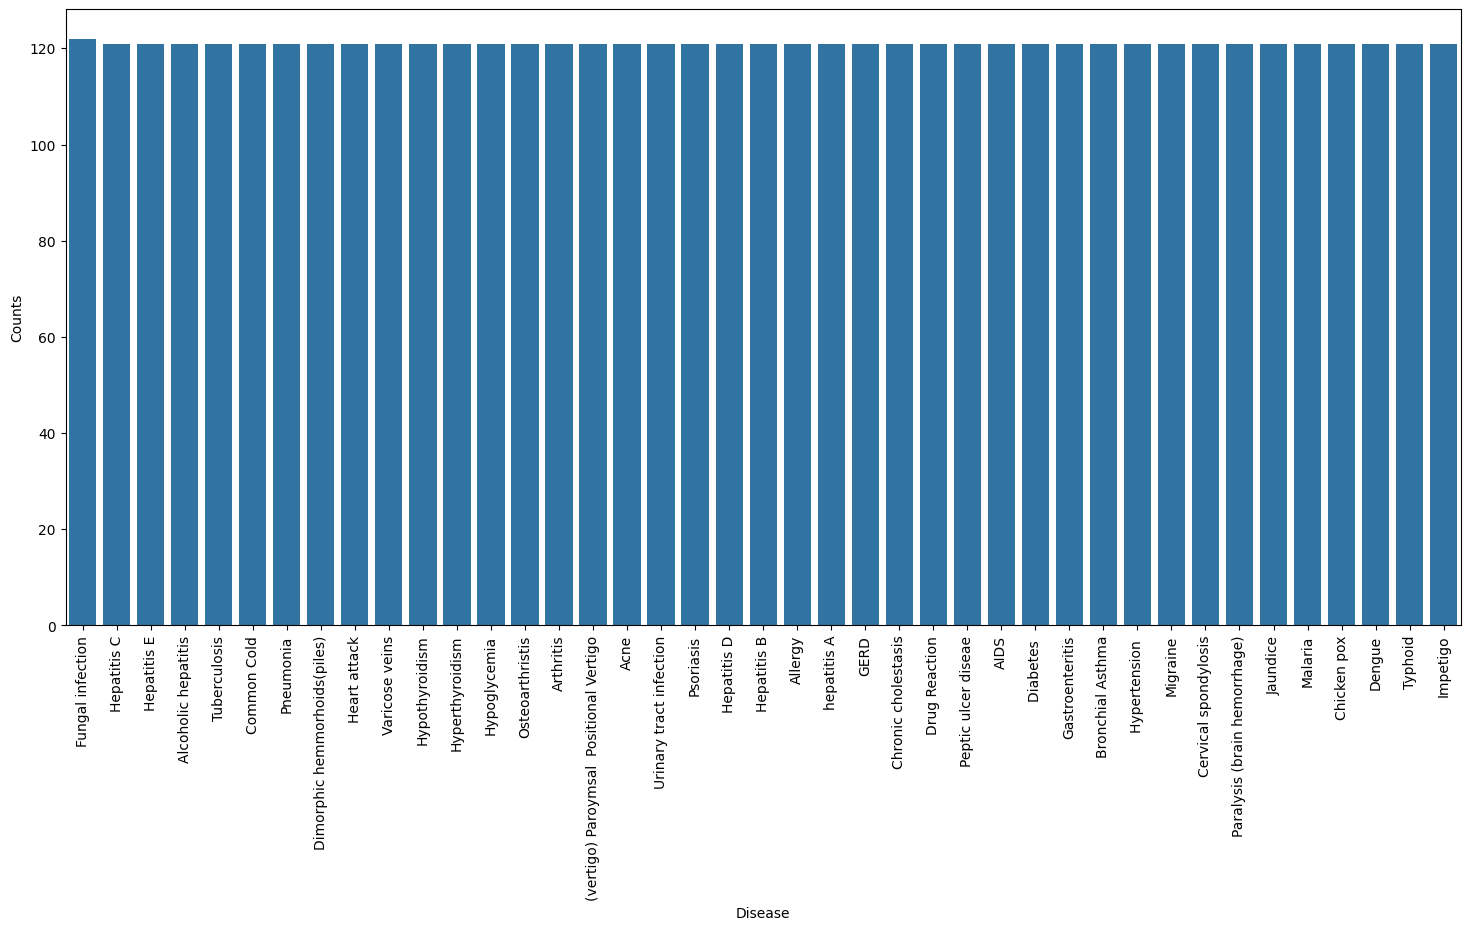

In [20]:
# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [21]:
#calculate the percentage of each prognosis for each skin rash category
agg_prognosis_by_itching=data.groupby(['itching','prognosis'])['prognosis'].count().unstack()/len(data)*100

#create a stacked bar chart
fig=px.bar(agg_prognosis_by_itching,
           barmode='stack',
           labels={'value':'Percentage','prognosis': 'Prognosis'},
           title='Percentage of Prognosis by Itching'
           )
#update layout 
fig.update_layout(
    xaxis_title='Itching',
    yaxis_title='Prognosis',
    legend_title='Prognosis',
    hovermode='x',
    hoverlabel=dict(bgcolor="white",font_size=12),
    height=600,
    width=800
)

fig.show()

In [22]:
# Choose the diagnosis you're interested in
chosen_diagnosis = "Fungal infection"

# Filter the dataset for the chosen prognosis
diagnosis_data = data[data['prognosis'] == chosen_diagnosis]

# Exclude the prognosis column to focus on symptoms
symptom_columns = data.columns[:-1]

# Calculate the mean of each symptom column for the chosen diagnosis
# This represents the probability of each symptom occurring in the diagnosis
symptom_means = diagnosis_data[symptom_columns].mean().sort_values(ascending=False).reset_index()
symptom_means.columns = ['Symptom', 'Frequency']

# Plotting the bar chart with Plotly Express
fig = px.bar(symptom_means, x='Frequency', y='Symptom', orientation='h', 
             title=f'Symptom Frequency for {chosen_diagnosis}',
             labels={'Frequency':'Frequency of Symptom Occurrence', 'Symptom': 'Symptoms'},
             color='Frequency',
             color_continuous_scale='magma')

fig.show()

In [23]:
data_input_X = data.drop(columns=['prognosis'])
data_output_y = data['prognosis']

In [24]:
# For demonstration purposes, let's use a sample dataset from sklearn
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data_input_X = data.data
data_output_y = data.target

In [25]:
from sklearn.model_selection import train_test_split

# Assuming 'data_input' is your features and 'data_output' is your target
X_train, X_test, y_train, y_test = train_test_split(data_input_X, data_output_y, test_size=0.2, random_state=42)

In [26]:
print('X_train =', X_train.shape)
print('y_train.shape =', y_train.shape)
print('-------------------------------')
print('X_test =', X_test.shape)
print('y_test.shape =', y_test.shape)

X_train = (455, 30)
y_train.shape = (455,)
-------------------------------
X_test = (114, 30)
y_test.shape = (114,)


# Each model for our Machine Learing 

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    return accuracy, precision, recall, specificity, f1



In [28]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Evaluate the model
rf_result = evaluate_model(rf_model, X_test, y_test)
 # Print the evaluation metrics
print(f"Accuracy: {rf_result[0]}, \nPrecision: {rf_result[1]}, \nRecall: {rf_result[2]}, \nSpecificity: {rf_result[3]}, \nF1 Score: {rf_result[4]}")

Accuracy: 0.9649122807017544, 
Precision: 0.958904109589041, 
Recall: 0.9859154929577465, 
Specificity: 0.9302325581395349, 
F1 Score: 0.9722222222222222


In [29]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dct = DecisionTreeClassifier(random_state=42)

# Train the classifier
dct.fit(X_train, y_train)

# Evaluate the model
dt_result = evaluate_model(dct, X_test, y_test)

# Print the evaluation metrics
print(f"Accuracy: {dt_result[0]}, \nPrecision: {dt_result[1]}, \nRecall: {dt_result[2]}, \nSpecificity: {dt_result[3]}, \nF1 Score: {dt_result[4]}")

Accuracy: 0.9473684210526315, 
Precision: 0.9577464788732394, 
Recall: 0.9577464788732394, 
Specificity: 0.9302325581395349, 
F1 Score: 0.9577464788732394


In [30]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate the model
nb_result = evaluate_model(nb_model, X_test, y_test)

# Print the evaluation metrics
print(f"Accuracy: {nb_result[0]}, \nPrecision: {nb_result[1]}, \nRecall: {nb_result[2]}, \nSpecificity: {nb_result[3]}, \nF1 Score: {nb_result[4]}")


Accuracy: 0.9736842105263158, 
Precision: 0.9594594594594594, 
Recall: 1.0, 
Specificity: 0.9302325581395349, 
F1 Score: 0.9793103448275862


In [31]:
# Support Vector Machine (SVM) Classifier
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
svm_result = evaluate_model(svm_model, X_test, y_test)

# Print the evaluation metrics
print(f"Accuracy: {svm_result[0]},\nPrecision: {svm_result[1]},\nRecall: {svm_result[2]},\nSpecificity: {svm_result[3]},\nF1 Score: {svm_result[4]}")

Accuracy: 0.956140350877193,
Precision: 0.9459459459459459,
Recall: 0.9859154929577465,
Specificity: 0.9069767441860465,
F1 Score: 0.9655172413793103


In [32]:
# Neural Network
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Evaluate the model
mpl_result = evaluate_model(nn_model, X_test, y_test)

# Print the evaluation metrics
print(f"Accuracy: {mpl_result[0]},\nPrecision: {mpl_result[1]},\nRecall: {mpl_result[2]},\nSpecificity: {mpl_result[3]},\nF1 Score: {mpl_result[4]}")

Accuracy: 0.9473684210526315,
Precision: 0.922077922077922,
Recall: 1.0,
Specificity: 0.8604651162790697,
F1 Score: 0.9594594594594594


In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate the model
lr_result = evaluate_model(lr_model, X_test, y_test)

# Print the evaluation metrics
print(f"Accuracy: {lr_result[0]},\nPrecision: {lr_result[1]},\nRecall: {lr_result[2]},\nSpecificity: {lr_result[3]},\nF1 Score: {lr_result[4]}")

Accuracy: 0.9649122807017544,
Precision: 0.958904109589041,
Recall: 0.9859154929577465,
Specificity: 0.9302325581395349,
F1 Score: 0.9722222222222222


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [34]:
# Create a dictionary with the results
models_results = {
    "Random Forest": rf_result,
    "Decision Tree": dt_result,
    "Naive Bayes": nb_result,
    "Support Vector Classifier": svm_result,
    "Neural Network": mpl_result,
    "Logistic Regression": lr_result
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(models_results, index=["Accuracy", "Precision", "Recall", "Specificity", "F1 Score"]).T

# Print the DataFrame
print(results_df)

                           Accuracy  Precision    Recall  Specificity  \
Random Forest              0.964912   0.958904  0.985915     0.930233   
Decision Tree              0.947368   0.957746  0.957746     0.930233   
Naive Bayes                0.973684   0.959459  1.000000     0.930233   
Support Vector Classifier  0.956140   0.945946  0.985915     0.906977   
Neural Network             0.947368   0.922078  1.000000     0.860465   
Logistic Regression        0.964912   0.958904  0.985915     0.930233   

                           F1 Score  
Random Forest              0.972222  
Decision Tree              0.957746  
Naive Bayes                0.979310  
Support Vector Classifier  0.965517  
Neural Network             0.959459  
Logistic Regression        0.972222  


In [35]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate the model
knn_accuracy, knn_precision, knn_recall, knn_specificity, knn_f1 = evaluate_model(knn_model, X_test, y_test)

# Print the evaluation metrics
print('Accuracy:', knn_accuracy)
print('Precision:', knn_precision)
print('Recall:', knn_recall)
print('Specificity:', knn_specificity)
print('F1 Score:', knn_f1)

Accuracy: 0.956140350877193
Precision: 0.9342105263157895
Recall: 1.0
Specificity: 0.8837209302325582
F1 Score: 0.9659863945578232
